In [2]:
# Importing the diabetes dataset
import pandas as pd
diabetes= pd.read_csv("C:\\Users\\hp\Downloads\\diabetes.csv")
diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print (diabetes.groupby('Outcome').size())


Outcome
0    500
1    268
dtype: int64


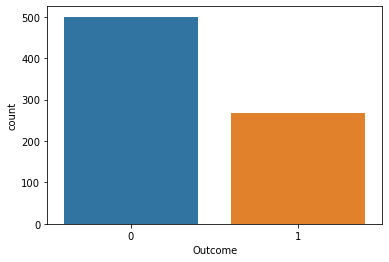

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.countplot(diabetes['Outcome'], label="Count")


In [7]:
diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Defining feature(X) and target(y) variables
X= diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y= diabetes['Outcome']




In [11]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)


In [12]:
# Importing and training a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred= tree.predict(X_test)


In [14]:
# Calculating the accuracy
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print (accuracy_score (y_test, y_pred))


[[112  44]
 [ 27  48]]
0.6926406926406926


Feature importances:
[0.04593424 0.29846015 0.12806031 0.05501252 0.06637417 0.12724347
 0.17422262 0.10469252]


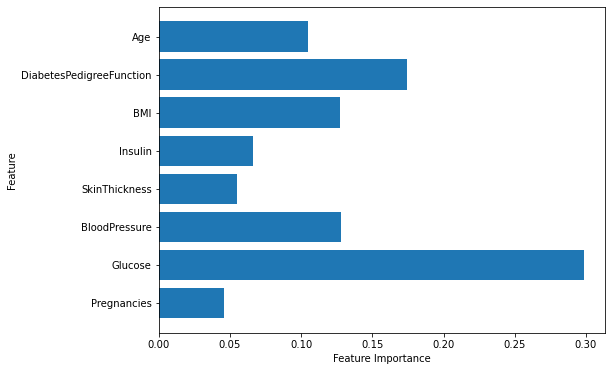

In [34]:
# Printing and Visualiazing Feature importance in Decision Tree
diabetes_features= [x for i, x in enumerate(diabetes.columns)if i!=8]

print("Feature importances:\n{}".format(tree.feature_importances_))
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features=8
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
plot_feature_importances_diabetes(tree)


In [30]:
# Importing and applying a Random Forest consisting of 100 trees on the diabetes data set and calculating the accuracy
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 100)
rf.fit(X_train, y_train)
print ("Accuracy on training set: {}".format(rf.score(X_train, y_train)))
print ("Accuracy on test set: {}".format(rf.score(X_test, y_test)))



Accuracy on training set: 1.0
Accuracy on test set: 0.7532467532467533


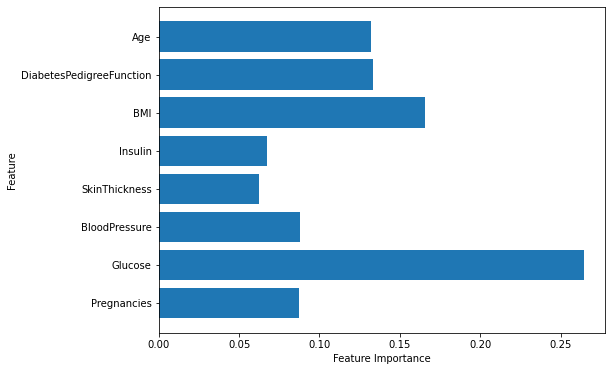

In [35]:
# Visualiazing Feature importance in Random Forest
plot_feature_importances_diabetes(rf)


In [39]:
# Generating model on selected features(BMI and Glucose) and calculating the accuracy
X= diabetes[['BMI', 'Glucose']]
y= diabetes['Outcome']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

print (confusion_matrix(y_test, y_pred))

print (accuracy_score (y_test, y_pred))



[[138  29]
 [ 26  38]]
0.7619047619047619
